In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('C:\\Users\\Cloud\\Internship\\titanicdata.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# a table with information about the DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
# Find missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
#Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)

In [7]:
#Convert categorical variables into numerical variables
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [8]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",0,27.0,0,0,A.5. 3236,8.0500,NaN,0
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,1
415,1307,0,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0
416,1308,0,3,"Ware, Mr. Frederick",0,27.0,0,0,359309,8.0500,NaN,0
417,1309,0,3,"Peter, Master. Michael J",0,27.0,1,1,2668,22.3583,NaN,1


Sex
0    266
1    152
Name: count, dtype: int64
Embarked
0    270
1    102
2     46
Name: count, dtype: int64


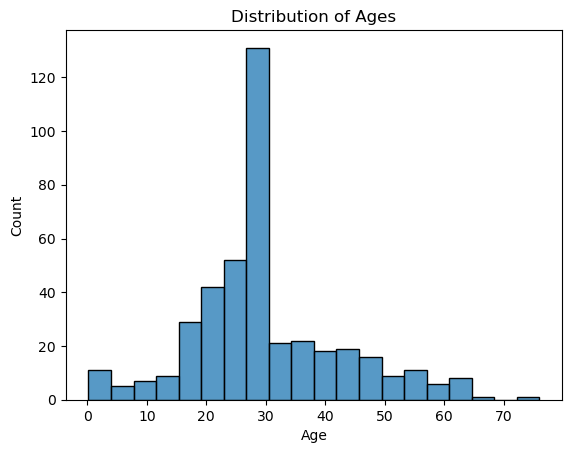

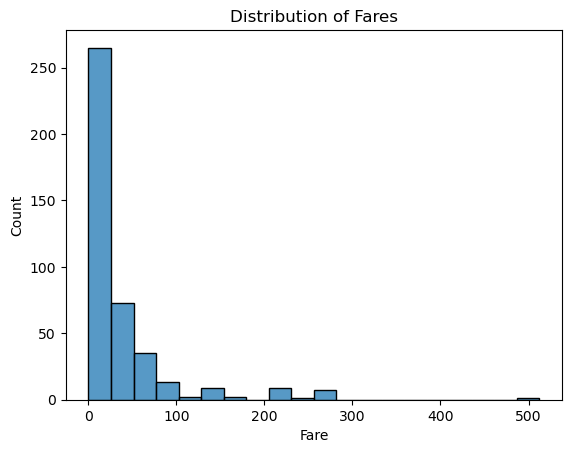

In [9]:
# Count the number of passengers in each category
sex_counts = df['Sex'].value_counts()
embarked_counts = df['Embarked'].value_counts()
print(sex_counts)
print(embarked_counts)

# Plot histograms of the 'Age' and 'Fare' columns
sns.histplot(data=df, x="Age", kde=False, bins=20)
plt.xlabel("Age")
plt.title("Distribution of Ages")
plt.show()

sns.histplot(data=df, x="Fare", kde=False, bins=20)
plt.xlabel("Fare")
plt.title("Distribution of Fares")
plt.show()


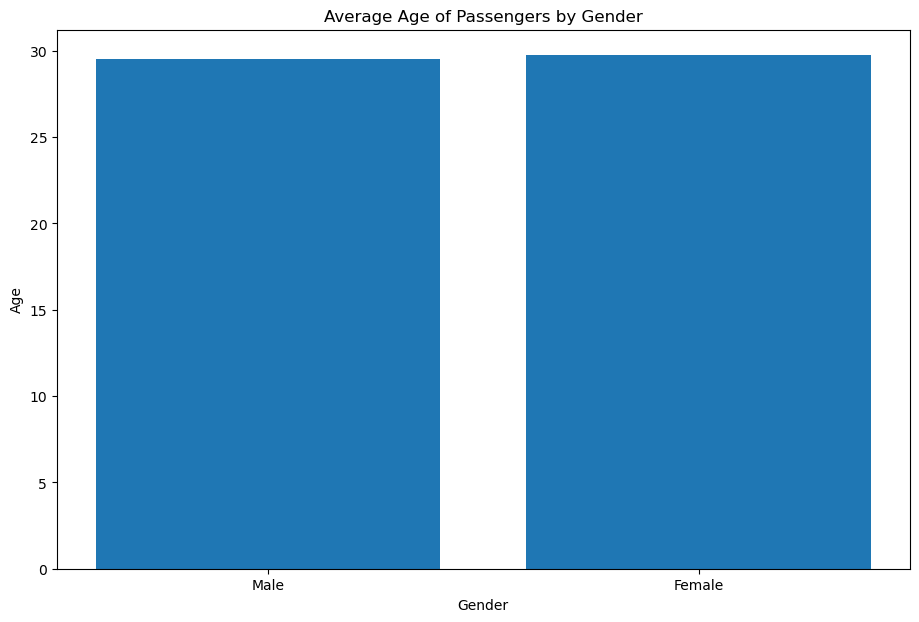

In [10]:
plt.figure(figsize=(11, 7))

male_df = df[df['Sex'] == 0]
female_df = df[df['Sex'] == 1]

plt.bar(["Male", "Female"], [male_df['Age'].mean(), female_df['Age'].mean()])
plt.xlabel("Gender")
plt.ylabel("Age")
plt.title("Average Age of Passengers by Gender")
plt.show()

C:\Users\Cloud\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


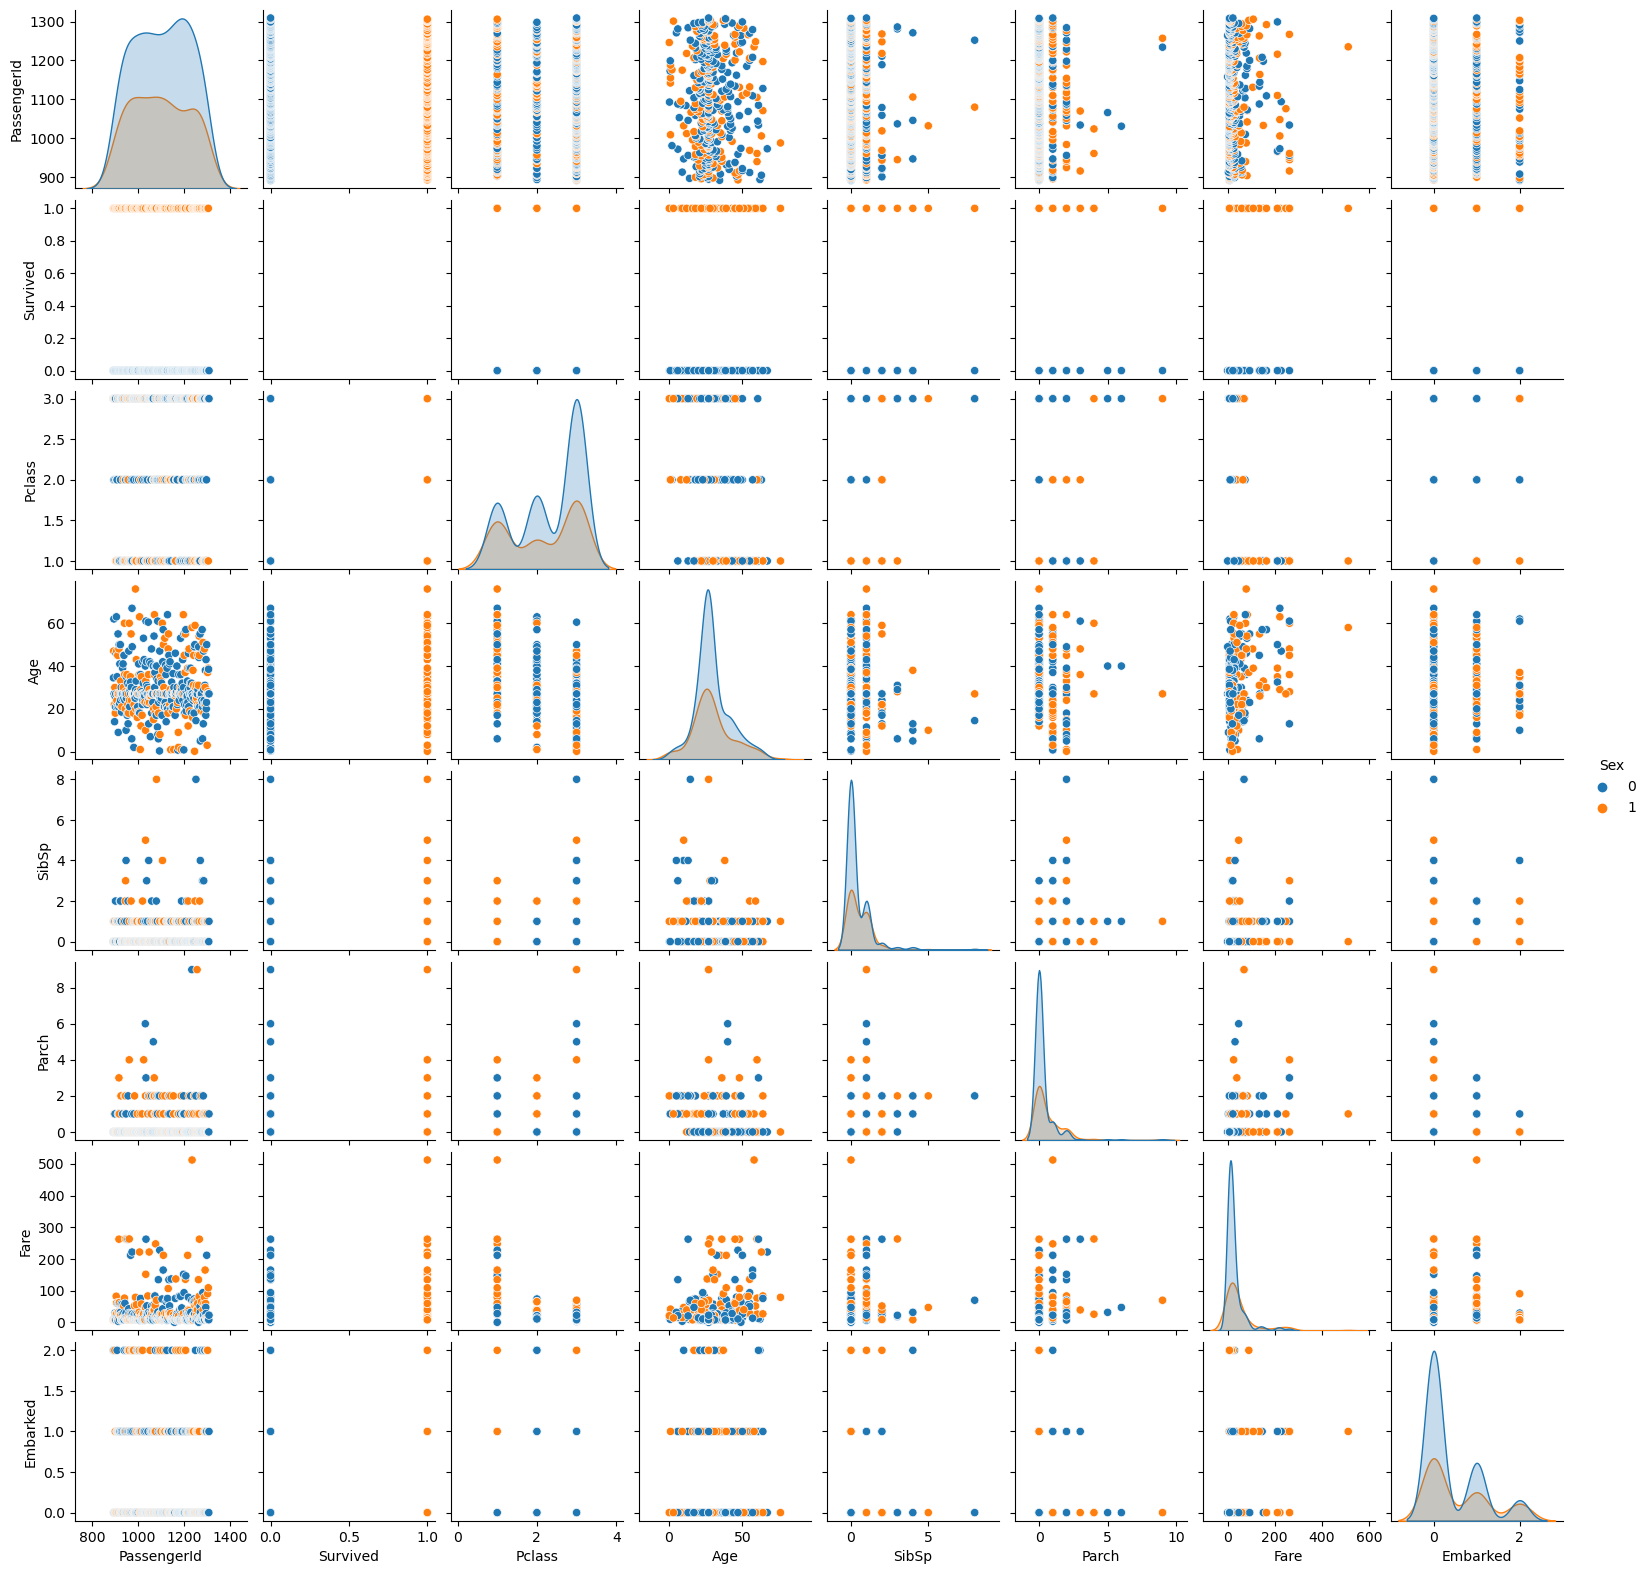

In [12]:
sns.pairplot(df, hue='Sex', height=2)